<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Exploring-Data" data-toc-modified-id="Exploring-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring Data</a></span><ul class="toc-item"><li><span><a href="#Null-Data" data-toc-modified-id="Null-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Null Data</a></span></li><li><span><a href="#Data-Type" data-toc-modified-id="Data-Type-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Type</a></span></li></ul></li><li><span><a href="#Graphical-Exploration" data-toc-modified-id="Graphical-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Graphical Exploration</a></span><ul class="toc-item"><li><span><a href="#Analysis-by-Purchase-Period" data-toc-modified-id="Analysis-by-Purchase-Period-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Analysis by Purchase Period</a></span></li><li><span><a href="#Analysis-by-Customer-State" data-toc-modified-id="Analysis-by-Customer-State-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Analysis by Customer State</a></span></li><li><span><a href="#Analysis-by-Payment-Type" data-toc-modified-id="Analysis-by-Payment-Type-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analysis by Payment Type</a></span></li><li><span><a href="#Analysis-by-Product-Categories" data-toc-modified-id="Analysis-by-Product-Categories-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Analysis by Product Categories</a></span></li><li><span><a href="#Analysis-by-Review-Score" data-toc-modified-id="Analysis-by-Review-Score-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Analysis by Review Score</a></span></li></ul></li></ul></div>

This kernel will present Exploratory Data Analysis on Brazilian E-Commerce behavior. The data was provided by Olist in 8 different datasets containing about 100k orders and the kernel will focus on **orders**, **customers**, **payments**, **products** and **reviews** datasets.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Functions

In [2]:
def format_spines(ax, right_border=True):
    """
    this function sets up borders from an axis and personalize colors
    """    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    """
    this function plots data setting up frequency and percentage in a count plot;
    this also sets up borders and personalization
    """    
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Setting up borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()

def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
    """
    this function plots data setting up frequency and percentage in a bar plot; 
    this algo sets up borders and personalization
    """
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=13, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()
    
def add_series_working_days(series_name, df, date_col1, date_col2):
    """
    Função extremamente importante: calcula os dias úteis entre duas datas e retorna este valor
    como uma coluna adicional em um dataframe
    
    Input:
        series_names: nome da nova série criada para alocar a diferença em dias úteis
        df: conjunto de dados onde as colunas de data se encontram
        date_col1: coluna de datas 1
        date_col2: coluna de datas 2
        
    Returns:
        df_return: dataframe com coluna de dias úteis já inserida
    """
    # Calculando lista com diferença entre datas
    time_list = []
    idx = 0
    second_date_series = df[date_col2].values.astype('datetime64[D]')
    for date in df[date_col1].values.astype('datetime64[D]'):
        second_date = second_date_series[idx]
        try:
            workdays = np.busday_count(date, second_date)
        except:
            workdays = np.NaN
        time_list.append(workdays)
        idx += 1
    
    # Adicionando ao dataframe e eliminando valores nulos
    df_return = df.copy()
    df_return[series_name] = pd.Series(time_list)
    df_return.dropna(inplace=True)
    
    return df_return
    
    return df_return

def communicate_params(frete, entrega, estimativa):
    """
    this function assists the analysis by customer state and plots usefull information
    in the first row of an axis
    """
    # Communicating mean freight value
    axs[0, 0].text(0.5, 0.12, str(f'Mean Freight Value \nR${frete:.2f}'),
                   fontsize=13, ha='center')
    axs[0, 0].axis('off')
    
    # Communicating mean delivery time
    axs[0, 1].text(0.5, 0.12, 
                   str(f'Mean Delivery Time \n{int(entrega)} working days.'),
                   fontsize=13, ha='center')
    axs[0, 1].axis('off')
    
    # Communicating difference between delivery time and estimated time
    if mean_diff_estimative > 0:
        inf = 'before'
    else:
        inf = 'after'
    text_diff_estimative = f'On average, orders are delivered \n{int(estimativa)} \
working days \n{inf} estimated time.'
    axs[0, 2].text(0.5, 0.10, 
                   str(text_diff_estimative), fontsize=13, ha='center')
    axs[0, 2].axis('off')
    
def plot_param(df, col, title, xlim, n_row, n_col, y='customer_state', div_xlim=0, 
               one_axis=False, xlabel=[], ylabel='Estado'):
    """
    Função utilizada para plotar um estudo comparativo de acordo com o tema, 
    separando análises de dos 5 Melhores e 5 Piores em assuntos pré-determinados
    
    Input:
        df: dataframe com as informações
        col: coluna com a informação a ser analisada
        title: título da análise
        xlim: limite no eixo X dos números
        n_row: índice da linha onde a plotagem será realizada
        n_col: índice da coluna onde a plotagem será realizada
    """
    # Configurando eixos
    if one_axis:
        ax_top = axs[n_col]
        ax_last = axs[n_col+1]
    else:
        ax_top = axs[n_row, n_col]
        ax_last = axs[n_row+1, n_col]
    
    # Primeiro passo: plotando Top 5
    df.sort_values(by=col, ascending=False, inplace=True)
    top5 = df.iloc[:5, :]
    sns.barplot(x=col, y=y, data=top5, ci=None, palette='Blues_d', ax=ax_top)
    format_spines(ax_top, right_border=False)
    ax_top.set_title(title)
    ax_top.set_xlim(0, xlim)
    ax_top.set_xlabel(xlabel)
    if n_col > 0:
        ax_top.set_ylabel('')
    else:
        ax_top.set_ylabel(ylabel)
    
    # Segundo passo: plotando Top 5 inverso
    last5 = df.iloc[-5:, :]
    sns.barplot(x=col, y=y, data=last5, ci=None, palette='Blues_d', ax=ax_last)
    format_spines(ax_last, right_border=False)
    ax_last.set_title(title.replace('Maior', 'Menor'))
    if div_xlim > 0:
        ax_last.set_xlim(0, xlim/div_xlim)
    else:
        ax_last.set_xlim(0, xlim)
    ax_last.set_xlabel(xlabel)
    if n_col > 0:
        ax_last.set_ylabel('')
    else:
        ax_last.set_ylabel(ylabel)

## Exploring Data

In [3]:
# Reading all datasets
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')

In [4]:
# Looking at all attributes in available data
dataframes = {
    'Customers': df_customers,
    'Geolocation': df_geolocation,
    'Orders': df_orders,
    'Items': df_items,
    'Payments': df_payments,
    'Reviews': df_reviews,
    'Products': df_products,
    'Sellers': df_sellers
}

for df_name, df in dataframes.items():
    print(f'{df_name}')
    print(f'{list(df.columns)}\n')

Customers
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Geolocation
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Orders
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Items
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Reviews
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Products
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_wid

### Null Data

In [5]:
# Looking for null data in all dataframes
for df_name, df in dataframes.items():
    print(f'{df_name}: {df.isnull().any().any()}\n')

Customers: False

Geolocation: False

Orders: True

Items: False

Payments: False

Reviews: True

Products: True

Sellers: False



In [6]:
# Counting null data in datasets with True results in task above
for df_name, df in dataframes.items():
    if df.isnull().any().any():
        print(f'Dataset: {df_name}\n')
        print(f'{df.isnull().sum()}\n')

Dataset: Orders

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dataset: Reviews

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataset: Products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



Explaining null data:


* Null data in **Orders** dataset are from:

    - Orders without approval date;
    - Orders that weren't delivered to the carrier;
    - Orders that weren't delivered to the customer.


* Null data in **Reviews** dataset are from:

    - Orders without comments;
    - Comments without title;
  
  
* Null data in **Products** dataset are from:
    
    - Products without categories, with no name information, description, photos and attributes.

### Data Type

In [7]:
# Data type
for df_name, df in dataframes.items():
    print(f'Dataset: {df_name}\n')
    print(f'{df.dtypes}\n')

Dataset: Customers

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Dataset: Geolocation

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Dataset: Orders

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Dataset: Items

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
frei

In some attributes, it is necessary to change data type from _object_ to _datetime_. Let's see examples.

In [8]:
df_orders.loc[:0, ['order_purchase_timestamp', 'order_approved_at', 
                   'order_delivered_carrier_date', 'order_delivered_customer_date', 
                   'order_estimated_delivery_date']]

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [9]:
# Change columns to datetime in orders dataset
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Data type
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

## Graphical Exploration

In this session we will explore data in a deeper way. The goal is to study five areas of Brazilian e-commerce:

* Analysis by Purchase Period;
* Analysis by Customer State;
* Analysis by Payment Type;
* Analysis by Product Categories;
* Analysis by Review Score.

### Analysis by Purchase Period

Let's create three more attributes in orders dataset: **year**, **month** and **day of week**.

In [10]:
# Purchase Year
df_orders['order_purchase_year'] = \
df_orders['order_purchase_timestamp'].apply(lambda x: x.year)

# Purchase Month
df_orders['order_purchase_month'] = \
df_orders['order_purchase_timestamp'].apply(lambda x: x.month)

# Purchase Day of Week
df_orders['order_purchase_dayofweek'] = \
df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)

Now let's take a look at the range of observations in this dataset.

In [11]:
print(f'First observation was in: \
{df_orders["order_purchase_timestamp"].min()}')
print(f'Last observation was in: \
{df_orders["order_purchase_timestamp"].max()}')

First observation was in: 2016-09-04 21:15:19
Last observation was in: 2018-10-17 17:30:18


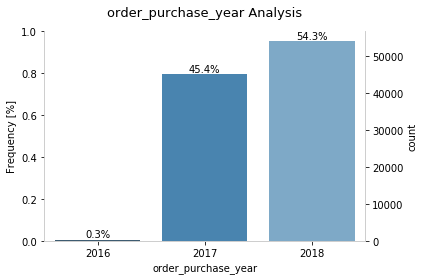

In [12]:
# Counting online sell by year
count_plot(feature='order_purchase_year', df=df_orders)
plt.show()

So only 0.3% of data in this order dataset are from 2016. It means that we have to take care of unbalanced data when looking for month and day of week behavior. Before we continue, let's make some data prep for future plots.

In [13]:
# Merging items dataset
df_orders_items = df_orders.merge(df_items, on='order_id', how='inner')

# Creating new column with item value + freight value
df_orders_items['total_sales'] = df_orders_items['price'] + df_orders_items['freight_value']

# Grouping by annual and monthly sales
df_sales = \
df_orders_items.groupby(['order_purchase_year', 'order_purchase_month'], 
                         as_index=False).sum()\
.loc[:, ['order_purchase_year', 'order_purchase_month', 'total_sales']]

df_sales_2016 = df_sales[df_sales['order_purchase_year']==2016]
df_sales_2017 = df_sales[df_sales['order_purchase_year']==2017]
df_sales_2018 = df_sales[df_sales['order_purchase_year']==2018]

In [14]:
# Filling data in months that didn't appeared on dataset
months = np.arange(1, 13)
df_append = pd.DataFrame({})
grouped_dfs = df_sales_2016, df_sales_2017, df_sales_2018
years = [2016, 2017, 2018]
idx = 0

for df in grouped_dfs:
    for month in months:
        # If the month doesn't exists in dataset...
        if month not in df['order_purchase_month'].values:
            dict_append = {
                'order_purchase_year': years[idx],
                'order_purchase_month': month,
                'total_sales': 0
            }
            df_append = df_append.append(dict_append, ignore_index=True)
    # Input dict on dataframe and sort values
    df = df.append(df_append).astype(int)
    df.sort_values(by='order_purchase_month', inplace=True)
    df_append = pd.DataFrame({})
    
    if idx == 0:
        df_sales_2016 = df
    elif idx == 1:
        df_sales_2017 = df
    else:
        df_sales_2018 = df
    idx += 1

Now let's visualyze what we have in a total sales plot by month.

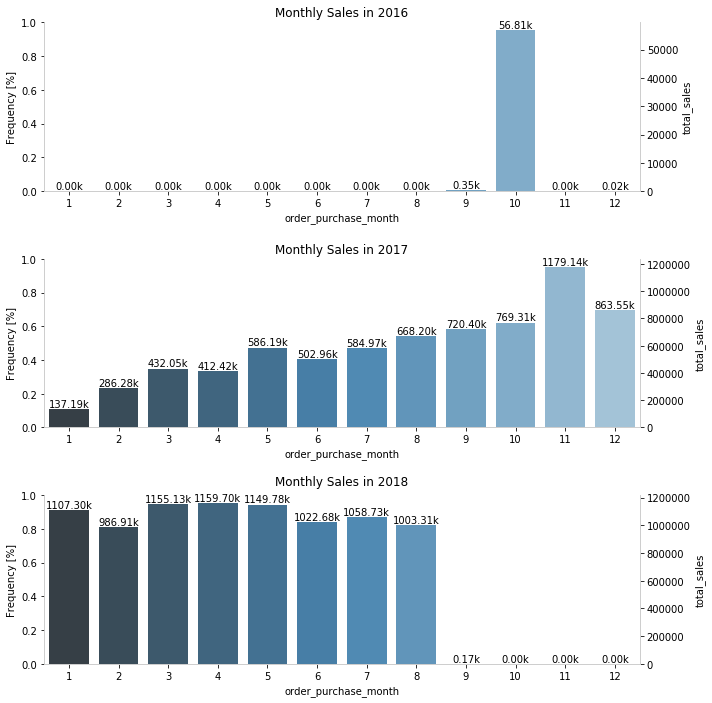

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2018, ax=axs[2], value=True)
axs[0].set_title('Monthly Sales in 2016')
axs[1].set_title('Monthly Sales in 2017')
axs[2].set_title('Monthly Sales in 2018', pad=10)
plt.show()

And what about the evolution of sales considering all observations?

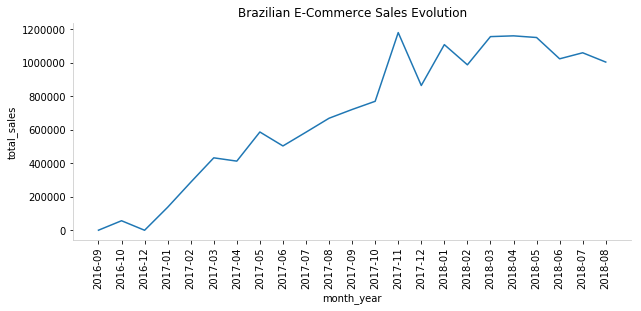

In [16]:
# Changing the month attribute for correct ordenation
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(str).\
apply(lambda x: '0' + x if len(x) == 1 else x)

# Creating new year-month column
df_sales['month_year'] = df_sales['order_purchase_year'].astype(str) + '-' + \
df_sales['order_purchase_month'].astype(str)
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(int)

# PLotting
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(x='month_year', y='total_sales', data=df_sales.iloc[:-1, :])
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Brazilian E-Commerce Sales Evolution')
plt.show()

Let's compare Brazilian E-Commerce in 2017 and 2018.

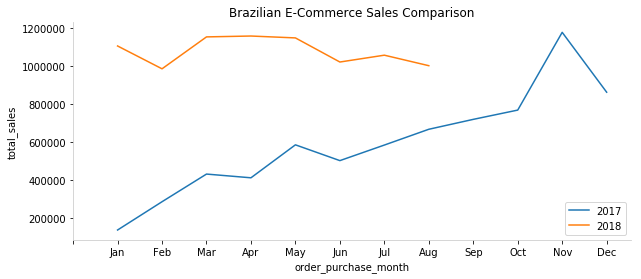

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(x='order_purchase_month', y='total_sales', data=df_sales_2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='total_sales', 
                  data=df_sales_2018.iloc[:-4, :], label='2018')
format_spines(ax, right_border=False)
ax.set_title('Brazilian E-Commerce Sales Comparison')
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
                           'Oct', 'Nov', 'Dec'])
plt.show()

Now let's take a look at total sales by day of week in the last three years.

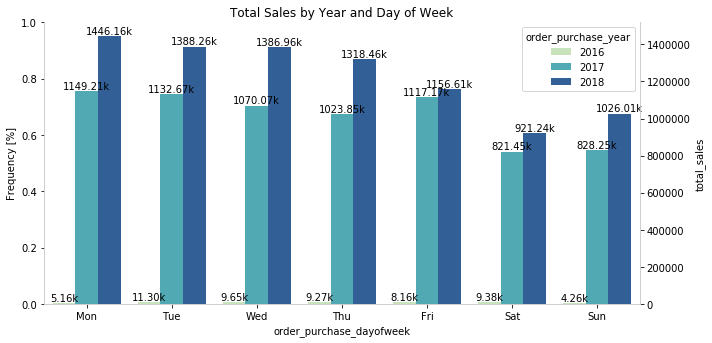

In [18]:
df_sales_dow = \
df_orders_items.groupby(['order_purchase_year', 'order_purchase_dayofweek'], 
                        as_index=False).sum()\
.iloc[:, np.c_[0, 1, 6][0]]

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
bar_plot(x='order_purchase_dayofweek', y='total_sales', hue='order_purchase_year', 
         df=df_sales_dow, colors='YlGnBu', value=True)
ax.set_title('Total Sales by Year and Day of Week')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Of course as we have small data registered in 2016, we can't see so much in that year. Let's visualyze the mean sales by day of week considering all three years.

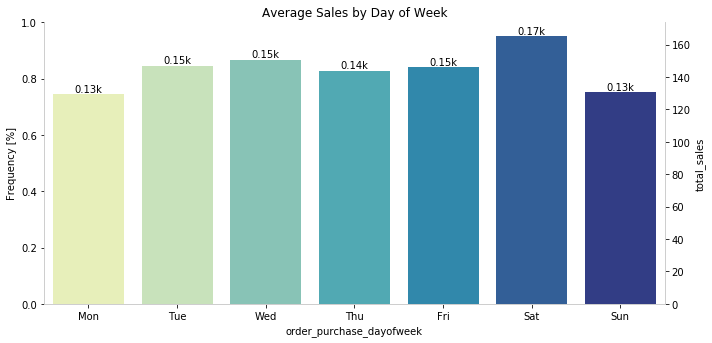

In [19]:
# Mean sales by day of week
df_sales_dow_mean = \
df_orders_items.groupby(['order_purchase_year', 'order_purchase_dayofweek'], 
                        as_index=False).mean()\
.iloc[:, np.c_[0, 1, 6][0]]

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
bar_plot(x='order_purchase_dayofweek', y='total_sales', 
         df=df_sales_dow_mean, colors='YlGnBu', value=True)
ax.set_title('Average Sales by Day of Week')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### Analysis by Customer State

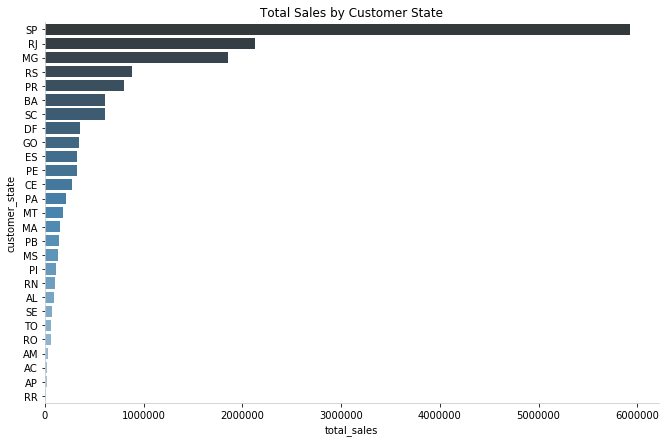

In [20]:
# Merging customer dataset
df_sales_customer = df_orders_items.merge(df_customers, on='customer_id', how='inner')

# Grouping by customer state
df_sales_state = df_sales_customer.groupby(['customer_state'], 
                                          as_index=False).sum().iloc[:, np.c_[(0, -2, -3)][0]]
df_sales_state.sort_values(by='total_sales', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(11, 7))
sns.barplot(x='total_sales', y='customer_state', data=df_sales_state, ci=None,
                 palette='Blues_d')
format_spines(ax, right_border=False)
ax.set_title('Total Sales by Customer State')

plt.show()

We see that Sao Paulo state is the leader in e-commerce transactions. Before we continue, let's prepare the data for the future analysis.

In [21]:
# Computing working days for delivery
df_delivery_time = add_series_working_days(series_name='time_to_delivery', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_purchase_timestamp', 
                                           date_col2 = 'order_delivered_customer_date')

# Grouping by customer state
df_delivery_time = df_delivery_time.groupby(['customer_state'], as_index=False).mean()
df_delivery_time = df_delivery_time.iloc[:, np.c_[(0, -1)][0]]

In [22]:
# Computing working days between delivery and estimated time
df_diff_est_deliv = add_series_working_days(series_name='diff_est_deliv', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_delivered_customer_date', 
                                           date_col2 = 'order_estimated_delivery_date')

# Grouping by customer state
df_diff_est_deliv = df_diff_est_deliv.groupby(['customer_state'], as_index=False).mean()
df_diff_est_deliv = df_diff_est_deliv.iloc[:, np.c_[(0, -1)][0]]
df_diff_est_deliv['diff_est_deliv'] = df_diff_est_deliv['diff_est_deliv'].astype(int)

In [23]:
# Computing freight value
df_mean_freight = df_sales_customer.groupby(['customer_state'], 
                                as_index=False).mean().iloc[:, np.c_[(0, -2, -3)][0]]
mean_freight_value = df_mean_freight['freight_value'].mean()
mean_delivery_time = df_delivery_time['time_to_delivery'].mean()
mean_diff_estimative = df_diff_est_deliv['diff_est_deliv'].mean()

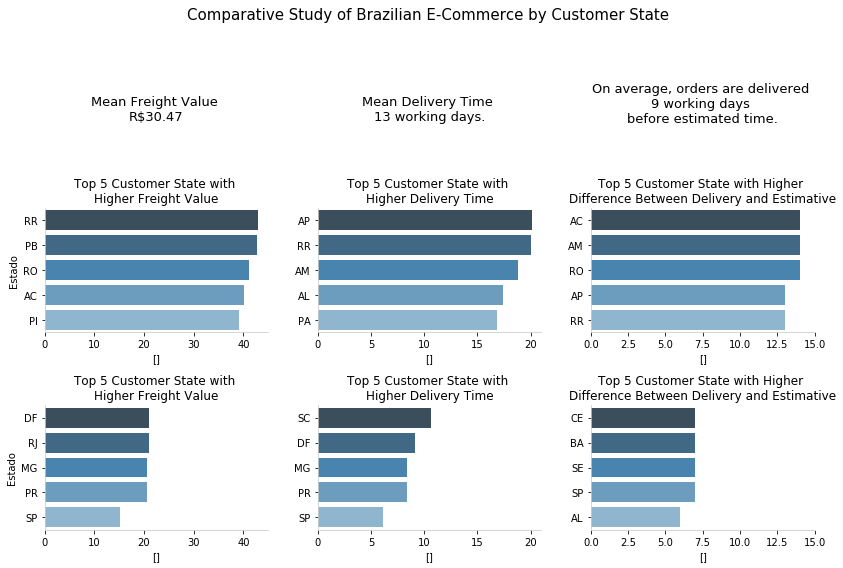

In [24]:
# Plotando
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
communicate_params(mean_freight_value, mean_delivery_time, mean_diff_estimative)

# Plotando informações de frete
plot_param(df=df_mean_freight, col='freight_value', 
           title='Top 5 Customer State with \nHigher Freight Value', xlim=45, n_row=1, n_col=0)

# Plotando informações sobre tempo de entrega
plot_param(df=df_delivery_time, col='time_to_delivery', 
           title='Top 5 Customer State with \nHigher Delivery Time', xlim=21, n_row=1, n_col=1)

# Plotando informações sobre diferença entre data de entrega e data estimada
plot_param(df=df_diff_est_deliv, col='diff_est_deliv', 
           title='Top 5 Customer State with Higher \nDifference Between Delivery and Estimative', 
           xlim=15, n_row=1, n_col=2)

plt.suptitle('Comparative Study of Brazilian E-Commerce by Customer State', size=15)
plt.tight_layout()
plt.show()

### Analysis by Payment Type

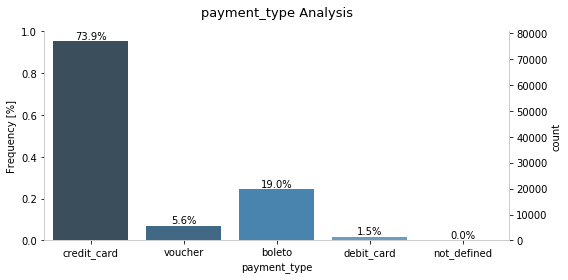

In [25]:
# Merging dataset with payment information
df_sales_payments = df_orders.merge(df_payments, on='order_id', how='inner')

fig, ax = plt.subplots(figsize=(8, 4))
count_plot(feature='payment_type', df=df_sales_payments)

Let's take a look at the mean amount paid by payment type through years. 

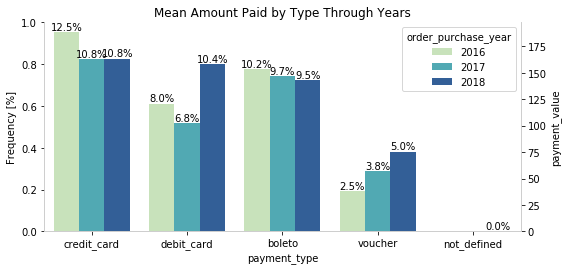

In [26]:
# Grouping data
df_payment_type_year = df_sales_payments.groupby(['order_purchase_year', 
                                                  'payment_type'], as_index=False).mean()
df_payment_type_year = df_payment_type_year.iloc[:, np.c_[(0, 1, -1)][0]]
df_payment_type_year = df_payment_type_year.sort_values(by='payment_value', ascending=False)

fig, ax = plt.subplots(figsize=(8, 4))
bar_plot(x='payment_type', y='payment_value', df=df_payment_type_year, 
         hue='order_purchase_year', colors='YlGnBu', value=False)
ax.set_title('Mean Amount Paid by Type Through Years')
plt.show()

As long as the time goes by, people tend to use voucher with higher values for payment. The mean amount paid with debit card also increased in 2018.

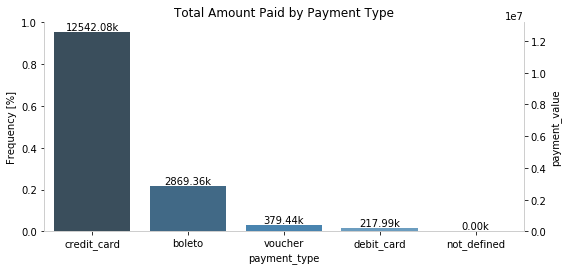

In [27]:
# Total amount paid by payment type
df_payment_type = df_sales_payments.groupby(['payment_type'], as_index=False).sum()
df_payment_type = df_payment_type.iloc[:, np.c_[(0, -1)][0]]
df_payment_type = df_payment_type.sort_values(by='payment_value', ascending=False)

fig, ax = plt.subplots(figsize=(8, 4))
bar_plot(x='payment_type', y='payment_value', df=df_payment_type, value=True)
ax.set_title('Total Amount Paid by Payment Type')
plt.show()

### Analysis by Product Categories

Let's prepare the data for product analysis.

In [28]:
# Merging data
df_order_products = df_orders_items.merge(df_products, on='product_id', how='inner')

# Sales counting
df_qtd_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).count()
df_qtd_product = df_qtd_product.loc[:, ['product_category_name', 'total_sales']]

# Total sales
df_sales_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).sum()
df_sales_product = df_sales_product.loc[:, ['product_category_name', 'total_sales']]

# Mean amount per product category
df_mean_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).mean()
df_mean_product = df_mean_product.loc[:, ['product_category_name', 'total_sales']]

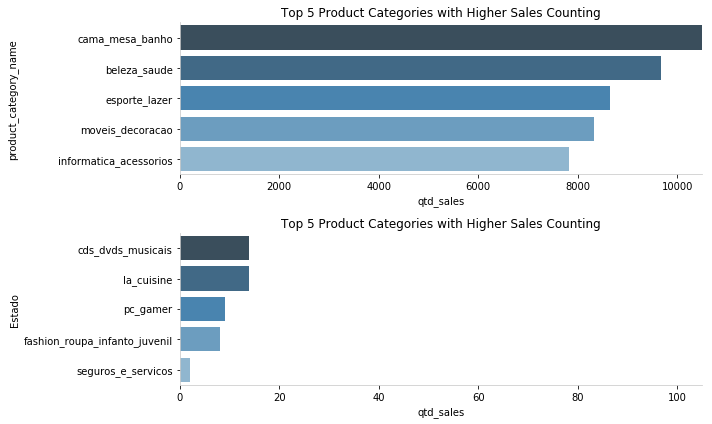

In [29]:
# Sales counting
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_qtd_product, col='total_sales', 
           title='Top 5 Product Categories with Higher Sales Counting',
           xlim=10500, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[1].set_xlabel('qtd_sales')
axs[0].set_xlabel('qtd_sales')
axs[0].set_ylabel('product_category_name', labelpad=40)
plt.tight_layout()
plt.show()

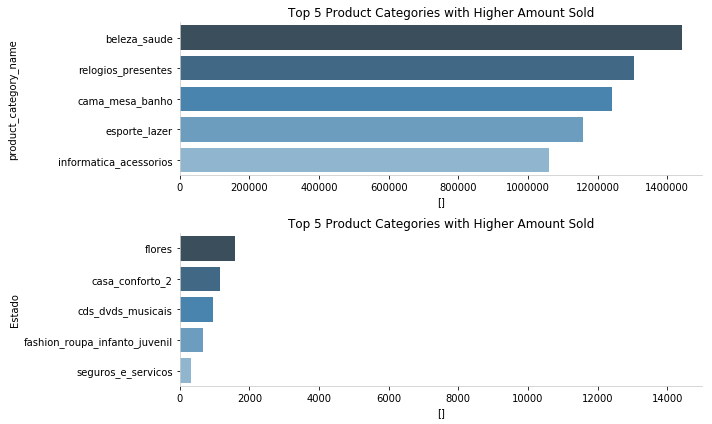

In [30]:
# Total amount of sales by product
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_sales_product, col='total_sales', 
           title='Top 5 Product Categories with Higher Amount Sold',
           xlim=1500000, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[0].set_ylabel('product_category_name', labelpad=40)
plt.tight_layout()
plt.show()

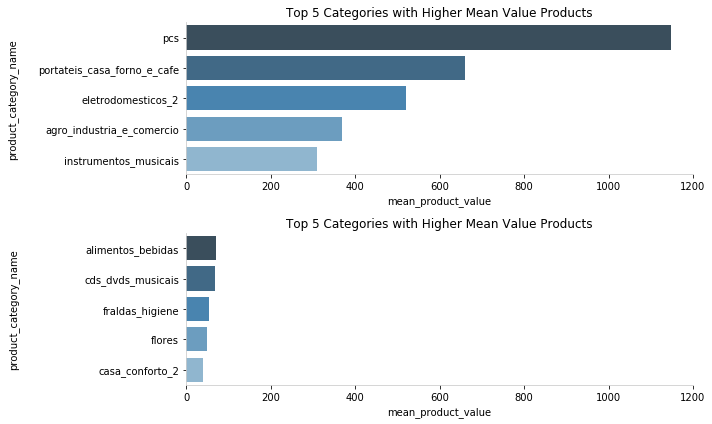

In [31]:
# Mean value for products in categories
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_mean_product, col='total_sales', 
           title='Top 5 Categories with Higher Mean Value Products',
           xlim=1200, n_row=0, n_col=0, y='product_category_name',
           one_axis=True)
axs[1].set_xlabel('mean_product_value')
axs[0].set_xlabel('mean_product_value')
axs[0].set_ylabel('product_category_name', labelpad=20)
axs[1].set_ylabel('product_category_name', labelpad=65)
plt.tight_layout()
plt.show()

### Analysis by Review Score

In [32]:
# Merging datasets
df_ord_prod_cust = df_order_products.merge(df_customers, on='customer_id', how='inner')
df_info_reviews = df_ord_prod_cust.merge(df_reviews, on='order_id', how='inner')
idx_columns = ['order_id', 'order_purchase_year', 'total_sales',
               'product_category_name', 'customer_city', 'customer_state',
               'review_score']
df_info_reviews = df_info_reviews.loc[:, idx_columns]

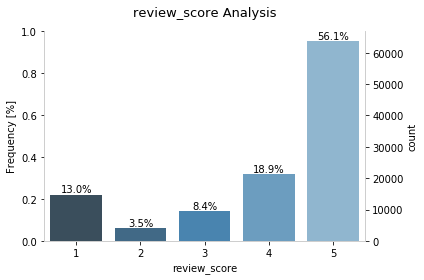

In [33]:
# Score counting
count_plot(feature='review_score', df=df_info_reviews)
plt.show()

Let's compare the score counting through the years

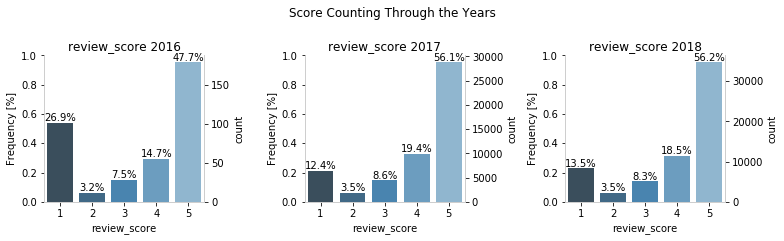

In [34]:
# Creating new datasets for each year
df_review_2016 = df_info_reviews.query('order_purchase_year=="2016"')
df_review_2017 = df_info_reviews.query('order_purchase_year=="2017"')
df_review_2018 = df_info_reviews.query('order_purchase_year=="2018"')

# Score through the years
fig, axs = plt.subplots(1, 3, figsize=(11, 3))
count_plot(feature='review_score', df=df_review_2016, ax=axs[0], 
           title='review_score 2016')
count_plot(feature='review_score', df=df_review_2017, ax=axs[1], 
           title='review_score 2017')
count_plot(feature='review_score', df=df_review_2018, ax=axs[2], 
           title='review_score 2018')
plt.suptitle('Score Counting Through the Years', y=1.1)
plt.show()

In [35]:
# Mean review score
mean_review_score = df_info_reviews['review_score'].mean()
print(f'Mean customer review score: {mean_review_score:.2f}')

Mean customer review score: 4.02


Let's look at the review score by customer state and product category.

In [36]:
# Grouping by customer state
df_state_review = df_info_reviews.groupby(['customer_state'], as_index=False).mean()
df_state_review.sort_values('review_score', ascending=False, inplace=True)
df_state_review = df_state_review.iloc[:, np.c_[(0, -1)][0]]

# Grouping by product category
df_product_review = df_info_reviews.groupby(['product_category_name'], as_index=False).mean()
df_product_review.sort_values('review_score', ascending=False, inplace=True)
df_product_review = df_product_review.iloc[:, np.c_[(0, -1)][0]]

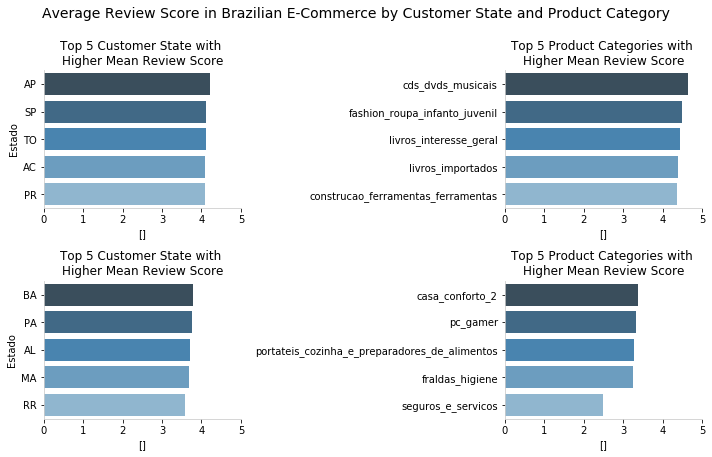

In [37]:
# Plotting data
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plot_param(df=df_state_review, col='review_score', y='customer_state',
           title='Top 5 Customer State with \nHigher Mean Review Score', xlim=5, n_row=0, n_col=0)
plot_param(df=df_product_review, col='review_score', y='product_category_name',
           title='Top 5 Product Categories with \nHigher Mean Review Score', xlim=5, 
           n_row=0, n_col=1)
axs[0, 1].set_ylabel('')
axs[1, 1].set_ylabel('')

plt.suptitle('Average Review Score in Brazilian E-Commerce by Customer State and Product Category', 
             y=1.05, size=14)
plt.tight_layout()
plt.show()

If you liked this kernel, please upvote!

**For the Future:**

* Predict total sales for the end of 2018 (September to December);
* Create a model for review score prediction